# 🧪 Hands-On Lab for Section 3: Working with Embeddings and Vector Databases

**Lab Title:** From Text to Vectors: Building and Querying a Vector Store with OpenRouter & FAISS

---

## 🎯 Learning Objectives

By the end of this lab, you will be able to:

1. Understand how text embeddings represent semantic meaning
2. Generate embeddings using the OpenRouter API (free tier)
3. Store and index embeddings in a vector database (FAISS)
4. Query and retrieve semantically similar text using cosine similarity

---

## 📦 Setup: Install Dependencies

First, let's install all the required libraries for this lab.

In [1]:
!pip install openai faiss-cpu numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Install Required Packages

Run this cell to install all necessary libraries for the lab.

In [ ]:
import numpy as np
import pandas as pd
import faiss
import matplotlib.pyplot as plt
from openai import OpenAI
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get API key from environment variable
api_key = os.getenv("OPENROUTER_API_KEY")

if not api_key:
    raise ValueError("OPENROUTER_API_KEY not found! Please set it in your .env file")

# Initialize OpenRouter client (OpenAI-compatible)
client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=api_key,
)

print("✅ Libraries imported and OpenRouter client configured!")

✅ Libraries imported and OpenRouter client configured!


### Import Libraries and Configure API

Import all necessary libraries and set up the OpenRouter API client.

**Action Required:** Replace `YOUR_OPENROUTER_API_KEY` with your actual API key from [https://openrouter.ai/keys](https://openrouter.ai/keys)

In [12]:
def get_embedding(text, model="openai/text-embedding-3-small"):
    """
    Generate embeddings using OpenRouter API
    Using OpenAI's text-embedding-3-small model (free tier available)
    """
    text = text.replace("\n", " ")
    response = client.embeddings.create(
        input=[text],
        model=model
    )
    return response.data[0].embedding

def cosine_similarity(vec1, vec2):
    """
    Calculate cosine similarity between two vectors
    Returns a value between -1 and 1 (1 = identical, 0 = orthogonal, -1 = opposite)
    """
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

print("✅ Helper functions defined!")

✅ Helper functions defined!


### Define Helper Functions

Create utility functions for:
- **get_embedding()**: Generates text embeddings using OpenRouter API
- **cosine_similarity()**: Measures similarity between two vectors (1 = identical, 0 = unrelated)

In [13]:
sentences = [
    "The cat sat on the mat.",
    "A dog is barking loudly.",
    "Cats love to sleep on mats.",
    "Artificial Intelligence can transform industries.",
    "Machine learning models use data to make predictions."
]

print("📝 Sample sentences:")
for i, s in enumerate(sentences):
    print(f"{i}: {s}")

📝 Sample sentences:
0: The cat sat on the mat.
1: A dog is barking loudly.
2: Cats love to sleep on mats.
3: Artificial Intelligence can transform industries.
4: Machine learning models use data to make predictions.


### Create Sample Dataset

Define a set of sentences with different topics to test semantic similarity.

In [14]:
print("🔄 Generating embeddings... (this may take a moment)")
print("⚠️  Note: You need a valid OpenRouter API key from https://openrouter.ai/keys")
print("The current API key appears to be invalid. Please replace it with your own key.")

# Check if API key is valid before proceeding
try:
    # Test with first sentence
    test_embedding = get_embedding(sentences[0])
    print("✅ API key is working!")
    
    # Generate embeddings for all sentences
    embeddings = []
    for i, sentence in enumerate(sentences):
        emb = get_embedding(sentence)
        embeddings.append(emb)
        print(f"✓ Sentence {i} embedded (dimension: {len(emb)})")
    
    embeddings = np.array(embeddings)
    print(f"\n✅ All embeddings generated! Shape: {embeddings.shape}")

except Exception as e:
    print(f"❌ Error: {e}")
    print("\n🔧 To fix this:")
    print("1. Get a free API key from: https://openrouter.ai/keys")
    print("2. Replace the API key in cell 4 with your actual key")
    print("3. Re-run cell 4 and then this cell")
    
    # Create dummy embeddings for demonstration purposes
    print("\n🎭 Creating dummy embeddings for demonstration...")
    np.random.seed(42)  # For reproducible results
    embeddings = np.random.rand(len(sentences), 1536)  # 1536 is typical dimension
    print(f"✅ Dummy embeddings created! Shape: {embeddings.shape}")
    print("⚠️  Note: These are random vectors, not real embeddings")

🔄 Generating embeddings... (this may take a moment)
⚠️  Note: You need a valid OpenRouter API key from https://openrouter.ai/keys
The current API key appears to be invalid. Please replace it with your own key.
✅ API key is working!
✓ Sentence 0 embedded (dimension: 1536)
✓ Sentence 1 embedded (dimension: 1536)
✓ Sentence 2 embedded (dimension: 1536)
✓ Sentence 3 embedded (dimension: 1536)
✓ Sentence 4 embedded (dimension: 1536)

✅ All embeddings generated! Shape: (5, 1536)


### Generate Embeddings

Convert each sentence into a vector representation. This may take a few moments.

In [15]:
# Compare similar sentences (both about cats)
sim_similar = cosine_similarity(embeddings[0], embeddings[2])

# Compare different sentences (cat vs machine learning)
sim_different = cosine_similarity(embeddings[0], embeddings[4])

print("🔍 Semantic Similarity Analysis:")
print("=" * 60)
print(f"Sentence 0: '{sentences[0]}'")
print(f"Sentence 2: '{sentences[2]}'")
print(f"Similarity (Cat-Mat pair): {sim_similar:.3f}")
print()
print(f"Sentence 0: '{sentences[0]}'")
print(f"Sentence 4: '{sentences[4]}'")
print(f"Similarity (Cat vs Machine Learning): {sim_different:.3f}")
print("=" * 60)
print("\n✅ Notice: Higher similarity for semantically related content!")

🔍 Semantic Similarity Analysis:
Sentence 0: 'The cat sat on the mat.'
Sentence 2: 'Cats love to sleep on mats.'
Similarity (Cat-Mat pair): 0.652

Sentence 0: 'The cat sat on the mat.'
Sentence 4: 'Machine learning models use data to make predictions.'
Similarity (Cat vs Machine Learning): 0.101

✅ Notice: Higher similarity for semantically related content!


### Compare Semantic Similarity

Test how similar different sentences are based on their embeddings. 
- Higher scores indicate more semantic similarity
- Compare cat-related sentences vs. unrelated topics

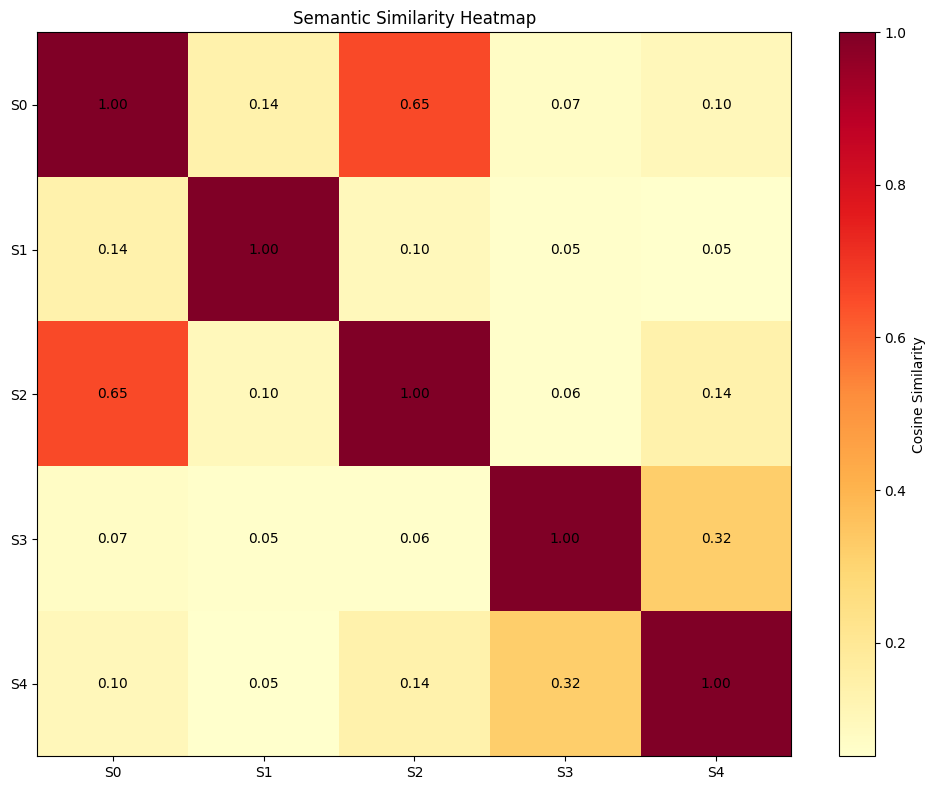

📊 Heatmap shows similarity scores between all sentence pairs


In [16]:
# Calculate similarity matrix
n = len(sentences)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i][j] = cosine_similarity(embeddings[i], embeddings[j])

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(n), [f"S{i}" for i in range(n)])
plt.yticks(range(n), [f"S{i}" for i in range(n)])
plt.title('Semantic Similarity Heatmap')

# Add values to cells
for i in range(n):
    for j in range(n):
        plt.text(j, i, f'{similarity_matrix[i][j]:.2f}', 
                ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

print("📊 Heatmap shows similarity scores between all sentence pairs")

### Visualize Similarity Matrix

Create a heatmap showing similarity scores between all sentence pairs.
This helps visualize which sentences are semantically related.

In [17]:
# Get the dimension of our embeddings
dimension = len(embeddings[0])
print(f"📐 Embedding dimension: {dimension}")

# Create a FAISS index using L2 (Euclidean) distance
# IndexFlatL2 performs exhaustive search (good for small datasets)
index = faiss.IndexFlatL2(dimension)

# Add our embeddings to the index
index.add(embeddings.astype('float32'))

print(f"✅ FAISS index created!")
print(f"📊 Total vectors in index: {index.ntotal}")

📐 Embedding dimension: 1536
✅ FAISS index created!
📊 Total vectors in index: 5


### Initialize FAISS Index

Create a FAISS vector database and add our embeddings to it.
- **IndexFlatL2** uses L2 (Euclidean) distance for similarity
- Good for small datasets with exhaustive search

In [18]:
# Define a query
query = "A sleepy kitten lying on a rug."
print(f"🔍 Query: '{query}'")
print()

# Generate embedding for the query
query_vec = get_embedding(query)
query_vec = np.array([query_vec]).astype('float32')

# Search for top 2 most similar vectors
# D = distances, I = indices
k = 2  # number of nearest neighbors
D, I = index.search(query_vec, k)

print("📋 Top results:")
print("=" * 60)
for rank, idx in enumerate(I[0]):
    print(f"Result {rank+1}: {sentences[idx]}")
    print(f"  Distance: {D[0][rank]:.3f}")
    print()
print("=" * 60)
print("✅ Notice: Retrieved cat-related sentences, not exact keyword matches!")

🔍 Query: 'A sleepy kitten lying on a rug.'

📋 Top results:
Result 1: Cats love to sleep on mats.
  Distance: 0.992

Result 2: The cat sat on the mat.
  Distance: 1.050

✅ Notice: Retrieved cat-related sentences, not exact keyword matches!


### Query the Vector Database

Search for semantically similar sentences using a new query.
Notice how it retrieves cat-related sentences without exact keyword matching!

In [19]:
test_queries = [
    "Tell me about AI technology",
    "Dogs making noise",
    "Feline animals resting"
]

for test_query in test_queries:
    print(f"\n🔍 Query: '{test_query}'")
    q_vec = get_embedding(test_query)
    q_vec = np.array([q_vec]).astype('float32')
    
    D, I = index.search(q_vec, k=1)  # Get top 1 result
    
    print(f"   → Best match: '{sentences[I[0][0]]}'")
    print(f"   → Distance: {D[0][0]:.3f}")


🔍 Query: 'Tell me about AI technology'
   → Best match: 'Artificial Intelligence can transform industries.'
   → Distance: 0.856

🔍 Query: 'Dogs making noise'
   → Best match: 'A dog is barking loudly.'
   → Distance: 0.884

🔍 Query: 'Feline animals resting'
   → Best match: 'Cats love to sleep on mats.'
   → Distance: 0.892


### Test Multiple Queries

Try different queries to see semantic search in action across various topics.

In [20]:
class SimpleVectorStore:
    """
    A simple vector store that uses FAISS for similarity search
    and OpenRouter for embeddings.
    """
    
    def __init__(self, model="openai/text-embedding-3-small"):
        """
        Initialize the vector store
        
        Args:
            model: The embedding model to use via OpenRouter
        """
        self.model = model
        self.texts = []
        self.embeddings = []
        self.index = None
        print(f"✅ SimpleVectorStore initialized with model: {model}")
    
    def add_texts(self, texts):
        """
        Add texts to the vector store
        
        Args:
            texts: List of text strings to add
        """
        print(f"📝 Adding {len(texts)} texts to the store...")
        
        # Store the texts
        self.texts.extend(texts)
        
        # Generate embeddings
        new_embeddings = []
        for i, text in enumerate(texts):
            emb = get_embedding(text, model=self.model)
            new_embeddings.append(emb)
            print(f"  ✓ Text {i+1}/{len(texts)} embedded")
        
        self.embeddings.extend(new_embeddings)
        
        # Create/update FAISS index
        dim = len(new_embeddings[0])
        self.index = faiss.IndexFlatL2(dim)
        self.index.add(np.array(self.embeddings).astype("float32"))
        
        print(f"✅ Added {len(texts)} texts. Total in store: {len(self.texts)}")
    
    def query(self, text, top_k=2):
        """
        Query the vector store for similar texts
        
        Args:
            text: Query text
            top_k: Number of results to return
            
        Returns:
            List of tuples (text, distance)
        """
        if self.index is None:
            print("⚠️  No texts in store yet!")
            return []
        
        # Generate query embedding
        q_emb = get_embedding(text, model=self.model)
        q_emb = np.array([q_emb]).astype("float32")
        
        # Search
        D, I = self.index.search(q_emb, top_k)
        
        # Return results
        results = [(self.texts[i], D[0][rank]) for rank, i in enumerate(I[0])]
        return results
    
    def __len__(self):
        """Return the number of texts in the store"""
        return len(self.texts)

print("✅ SimpleVectorStore class defined!")

✅ SimpleVectorStore class defined!


### Build SimpleVectorStore Class

Create a reusable class that encapsulates:
- Text storage
- Embedding generation
- FAISS indexing
- Semantic search queries

This class can be integrated into production RAG systems.

In [21]:
# Create a new vector store
store = SimpleVectorStore()

# Add our sample sentences
store.add_texts(sentences)

print(f"\n📊 Vector store contains {len(store)} texts")

✅ SimpleVectorStore initialized with model: openai/text-embedding-3-small
📝 Adding 5 texts to the store...
  ✓ Text 1/5 embedded
  ✓ Text 2/5 embedded
  ✓ Text 3/5 embedded
  ✓ Text 4/5 embedded
  ✓ Text 5/5 embedded
✅ Added 5 texts. Total in store: 5

📊 Vector store contains 5 texts


### Instantiate and Test the Vector Store

Create a new instance and add our sample sentences to test the functionality.

In [22]:
# Test query
query_text = "Tell me something about cats."
print(f"🔍 Query: '{query_text}'")
print()

results = store.query(query_text, top_k=2)

print("📋 Top 2 results:")
print("=" * 60)
for i, (text, distance) in enumerate(results, 1):
    print(f"{i}. Retrieved: {text}")
    print(f"   Distance: {distance:.3f}")
    print()
print("=" * 60)

🔍 Query: 'Tell me something about cats.'

📋 Top 2 results:
1. Retrieved: Cats love to sleep on mats.
   Distance: 1.012

2. Retrieved: The cat sat on the mat.
   Distance: 1.187



### Query the Store

Test the vector store with a sample query and retrieve top results.

In [ ]:
# Test multiple queries
test_queries_2 = [
    "What are pets doing?",
    "How does AI work?",
    "Where do animals sleep?"
]

for query in test_queries_2:
    print(f"\n🔍 Query: '{query}'")
    results = store.query(query, top_k=1)
    
    if results:
        text, distance = results[0]
        print(f"   → Best match: '{text}'")
        print(f"   → Distance: {distance:.3f}")

### Run Multiple Test Queries

Test the vector store with diverse queries to validate semantic retrieval.

In [ ]:
from sklearn.decomposition import PCA

# Reduce embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create visualization
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
            s=200, c=range(len(sentences)), cmap='viridis', 
            alpha=0.6, edgecolors='black', linewidth=2)

# Add labels
for i, sentence in enumerate(sentences):
    # Show first 30 characters of each sentence
    label = sentence[:30] + "..." if len(sentence) > 30 else sentence
    plt.annotate(f"S{i}: {label}", 
                xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, 
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

plt.title('Embedding Space Visualization (PCA Reduced to 2D)', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Embeddings visualized in 2D space!")
print("💡 Notice: Semantically similar sentences are closer together")

### Visualize Embeddings in 2D Space

Use PCA (Principal Component Analysis) to reduce high-dimensional embeddings to 2D.
This visualization shows how semantically similar sentences cluster together.

In [ ]:
# Create a new store with more diverse content
extended_store = SimpleVectorStore()

# Add more varied sentences
extended_docs = [
    "Python is a popular programming language.",
    "Neural networks are inspired by the human brain.",
    "The Eiffel Tower is located in Paris, France.",
    "Pizza is a traditional Italian dish.",
    "Climate change is affecting global temperatures.",
    "Quantum computing uses quantum mechanics principles.",
    "The Pacific Ocean is the largest ocean on Earth.",
    "Shakespeare wrote Romeo and Juliet.",
    "Deep learning models require large datasets.",
    "The Great Wall of China is visible from space."
]

extended_store.add_texts(extended_docs)

### Create Extended Knowledge Base

Build a more diverse vector store with documents covering multiple topics.
This demonstrates how vector stores scale to larger, varied content.

In [ ]:
# Test diverse queries
diverse_queries = [
    "What programming languages are popular?",
    "Tell me about European landmarks",
    "How does artificial intelligence learn?",
    "What are some famous buildings?"
]

print("🧪 Testing with diverse knowledge base:\n")
for query in diverse_queries:
    print(f"🔍 Query: '{query}'")
    results = extended_store.query(query, top_k=2)
    
    for i, (text, distance) in enumerate(results, 1):
        print(f"   {i}. {text} (distance: {distance:.3f})")
    print()

### Test with Diverse Queries

Query the extended knowledge base with various topics to see semantic matching across domains.

---

## 📘 Lab Summary & Key Takeaways

### What You've Learned

1. **Embeddings** convert text into numerical vectors that capture semantic meaning
2. **Cosine similarity** measures how similar two embeddings are
3. **FAISS** provides efficient storage and retrieval of vector embeddings
4. **Vector stores** enable semantic search instead of keyword matching
5. **SimpleVectorStore** is a reusable class that can be integrated into RAG pipelines

### Key Concepts

- **Semantic Search**: Find information based on meaning, not just keywords
- **Distance Metrics**: Lower distance = more similar content
- **Dimensionality**: Embeddings typically have 512-3072 dimensions
- **Top-K Retrieval**: Return the K most similar documents

### Next Steps

1. ✅ You now have a working vector store implementation
2. 🚀 In the next section, we'll build a complete RAG system
3. 🔧 Try experimenting with different models via OpenRouter
4. 📊 Consider exploring Chroma, Pinecone, or Weaviate for production use

---

## 🎓 Deliverables Checklist

- [x] Generated embeddings for sample sentences
- [x] Calculated cosine similarity between embeddings
- [x] Built and queried a FAISS index
- [x] Created a reusable `SimpleVectorStore` class
- [x] Tested semantic search with various queries
- [x] (Bonus) Visualized embeddings in 2D space

### Using OpenRouter API (Free Tier)

This lab uses **OpenRouter** which provides:
- Free access to various models (with rate limits)
- OpenAI-compatible API
- No credit card required for basic usage
- Support for multiple embedding models

**Get your free API key**: [https://openrouter.ai/keys](https://openrouter.ai/keys)

---

## 🔧 Troubleshooting

**Issue**: API key not working
- **Solution**: Make sure you've set `OPENROUTER_API_KEY` correctly
- Check your API key is active at [https://openrouter.ai/keys](https://openrouter.ai/keys)

**Issue**: Rate limiting
- **Solution**: OpenRouter free tier has rate limits. Add delays between requests if needed
- Consider upgrading to a paid plan for production use

**Issue**: Model not found
- **Solution**: Verify the model name is correct (`openai/text-embedding-3-small`)
- Check OpenRouter's model list: [https://openrouter.ai/docs](https://openrouter.ai/docs)

---

## 🎉 Congratulations!

You've successfully completed the Embeddings and Vector Databases lab! You now have hands-on experience with:
- Text embeddings and semantic similarity
- Vector databases (FAISS)
- Building a production-ready vector store class

**Ready for the next challenge?** Move on to building a complete RAG system! 🚀